In [2]:
# STEP 1: LOADING THE DATASET AND CHECKING BASIC INFO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1) Load the Dataset
df = pd.read_csv('marketing_campaign.xls', sep='\t')   #it's tab separated

# 2) CHECK BASIC INFO

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

Dataset shape: (2240, 29)

First few rows:
     ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]

Column names:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kid home', 'Teen home', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Missing values:
ID                 

In [3]:
# STEP 2: COMPREHENSIVE DATA EXPLORATION FOR GMM

# Set Display Options
pd.set_option ('display.max_columns', None) # Configures the Pandas library to display all columns of a DataFrame.
plt.style.use('seaborn-v0_8') # Sets the visual style for Matplotlib plots to look like the popular Seaborn library's default style (v0.8).

# 1. Check the full structure
print("="*60)
print("DATA EXPLORATION FOR GMM IMPLEMENTATION")
print("="*60)

print(f"\nDataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 2. Check all column names:
print("\n" + "="*60)
print("COLUMN NAMES:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


# 3. DATA TYPES AND MISSING VALUES ANALYSIS
print("\n" + "="*60)
print("DATA TYPES & MISSING VALUES:")
print("="*60)

# a) Create a summary DataFrame

data_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique(),
    'Sample Values': [df[col].dropna().unique()[:3] for col in df.columns]
})

# Sort by missing values
data_summary = data_summary.sort_values('Missing %', ascending=False)

print(data_summary.head(15))  # Show columns with most missing values first
print("\n" + "="*60)
print("KEY OBSERVATIONS:")
print("="*60)

DATA EXPLORATION FOR GMM IMPLEMENTATION

Dataset shape: (2240, 29)
Rows: 2240, Columns: 29

COLUMN NAMES:
 1. ID
 2. Year_Birth
 3. Education
 4. Marital_Status
 5. Income
 6. Kid home
 7. Teen home
 8. Dt_Customer
 9. Recency
10. MntWines
11. MntFruits
12. MntMeatProducts
13. MntFishProducts
14. MntSweetProducts
15. MntGoldProds
16. NumDealsPurchases
17. NumWebPurchases
18. NumCatalogPurchases
19. NumStorePurchases
20. NumWebVisitsMonth
21. AcceptedCmp3
22. AcceptedCmp4
23. AcceptedCmp5
24. AcceptedCmp1
25. AcceptedCmp2
26. Complain
27. Z_CostContact
28. Z_Revenue
29. Response

DATA TYPES & MISSING VALUES:
                 Data Type  Missing Values  Missing %  Unique Values  \
Income             float64              24   1.071429           1974   
ID                   int64               0   0.000000           2240   
Year_Birth           int64               0   0.000000             59   
Education           object               0   0.000000              5   
Marital_Status      objec

In [4]:
# STEP 3: DATA CLEANING AND PREPARATION (spending columns only)

# 1. Select spending columns (All 6 product categories)
spending_cols =  [
    'MntWines',           # Wine spending
    'MntFruits',          # Fruits spending  
    'MntMeatProducts',    # Meat products
    'MntFishProducts',    # Fish products
    'MntSweetProducts',   # Sweets
    'MntGoldProds'        # Gold products
]

# 2. Create a copy with only spending data
X_spending = df[spending_cols].copy()

print("="*60)
print("SPENDING DATA OVERVIEW")
print("="*60)

print (f"\nShape: {X_spending.shape}")
print (f"Rows: {X_spending.shape[0]}, Spending columns: {X_spending.shape[1]}")
print ("\nFirst 5 rows:")
print(X_spending.head())

# 3. Check for missing values (should be none from earlier)
print("\nMissing Values in Spending Columns")
print(X_spending.isnull().sum)

# 4. Quick Statistical Summary
print("\nDescriptive Statistics:")
print(X_spending.describe().round(2))

# 5. Check for zeros (customers who didn't buy certain categories)
print("\nCustomers with zero spending by category:")
for col in spending_cols:
    zero_pct = (X_spending[col] == 0).mean() * 100
    print(f"  {col:15}: {zero_pct:.1f}% spent nothing")

SPENDING DATA OVERVIEW

Shape: (2240, 6)
Rows: 2240, Spending columns: 6

First 5 rows:
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  
0            88  
1             6  
2            42  
3             5  
4            15  

Missing Values in Spending Columns
<bound method DataFrame.sum of       MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0        False      False            False            False             False   
1        False      False            False            False             False   
2        False      False

<function matplotlib.pyplot.show(close=None, block=None)>

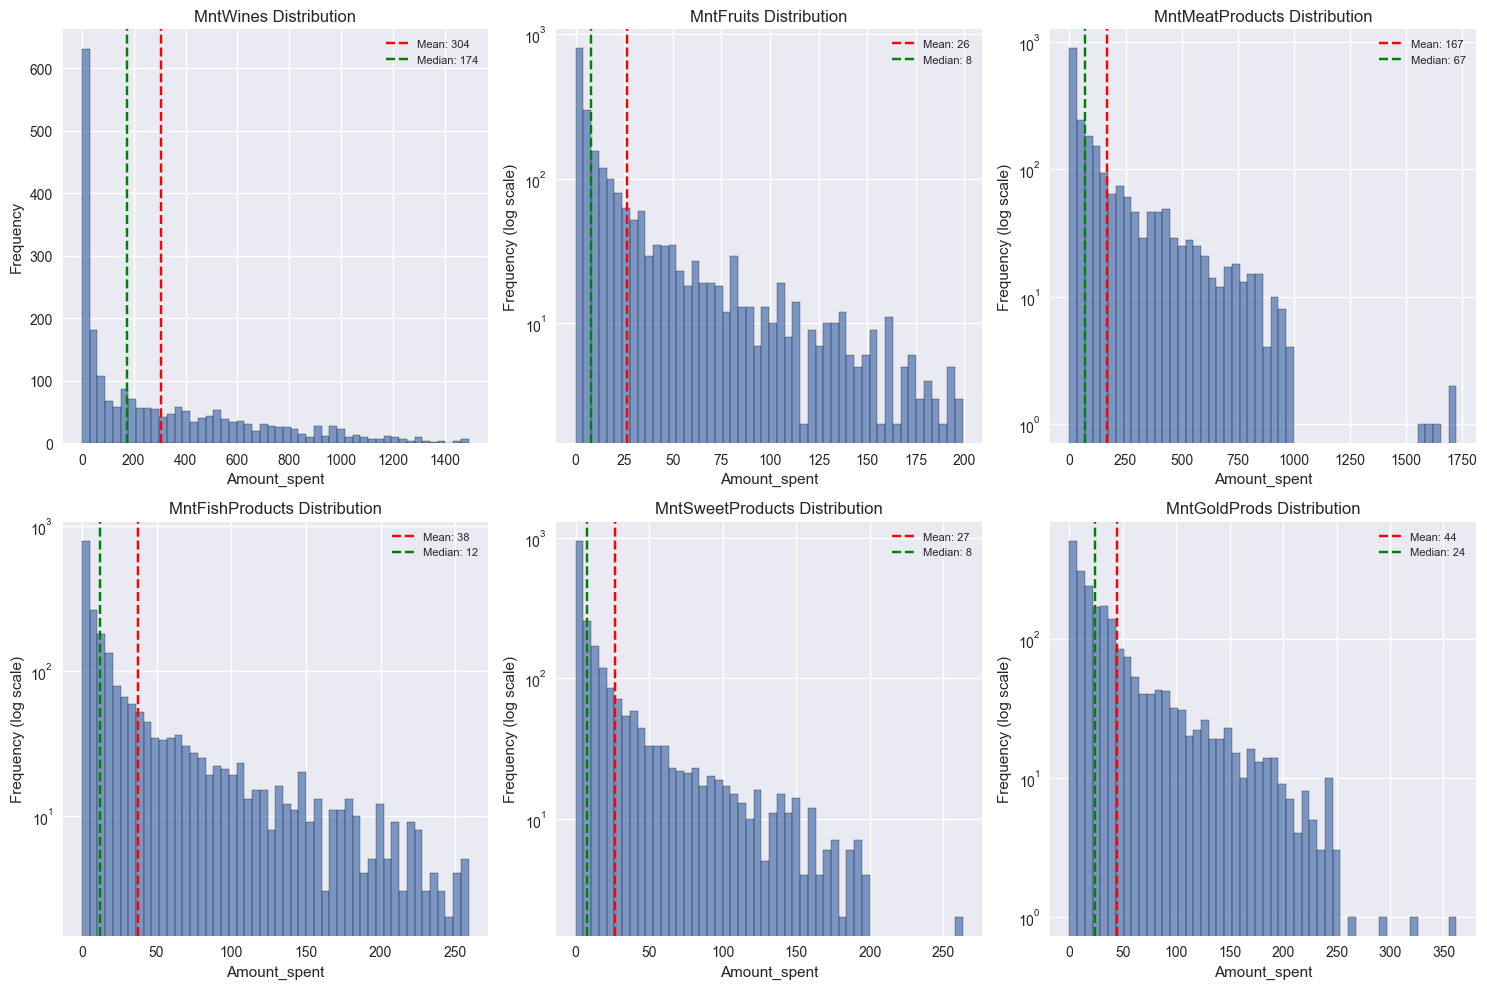

In [ ]:
# STEP 4: VISUALIZING SPENDING DISTRIBUTIONS

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(spending_cols):
    # Plot Histogram 
    axes[idx].hist(X_spending[col], bins = 50, edgecolor="black", alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12)
    axes[idx].set_xlabel("Amount_spent")
    axes[idx].set_ylabel("Frequency")

    # Add Stats
    mean_val = X_spending[col].mean()
    median_val = X_spending[col].median()
    axes[idx].axvline(mean_val, color="red", linestyle="--", label=f'Mean: {mean_val:.0f}')
    axes[idx].axvline(median_val, color="green", linestyle="--", label=f'Median: {median_val:.0f}')
    axes[idx].legend(fontsize=8)

    # Log scale for better visibility if data is skewed
    if X_spending[col].max() > 10 * X_spending[col].median(): # Checks if data is skewed by comparing max value to median value. If max>10*median, data is very skewed!
        axes[idx].set_yscale('log') # changes the y-axis to logarithmic scale i.e., instead of 10,20,30...it becomes 1,10,100,1000 (makes skewed data easier to see by compressing large ranges)
        axes[idx].set_ylabel('Frequency (log scale)')  # Updates the y-axis label to show we're using log scale


plt.tight_layout()
plt.show

In [ ]:
# STEP 5: HANDLE OUTLIERS (OPTIONAL BUT GOOD PRACTICE)

# OUTLIER DETECTION (IQR Method)
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

outlier_report = {}

for cols in spending_cols:
    Q1 = X_spending[col].quantile(0.25)
    Q3 = X_spending[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = X_spending[(X_spending[col] < lower_bound) | (X_spending[col] > upper_bound)] [col]  #  find all the outlier values
    outlier_pct = (len(outliers) / len(X_spending)) * 100 # Calculates what percentage of customers are outliers for this category

    outlier_report[col] = {
        'outliers': len(outliers),
        'percentage': outlier_pct,
        'lower': lower_bound,
        'upper': upper_bound
    }

    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({outlier_pct:.1f}%)")
    print(f"  Normal range: {lower_bound:.0f} to {upper_bound:.0f}")


# DECISION: For Level 1, we'll keep outliers (they're real big spenders)
# But note them for insights
print("\n" + "="*60)
print("DECISION: Keeping outliers (they're our premium customers)")
print("="*60)

OUTLIER DETECTION

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

MntGoldProds:
  Outliers: 207 (9.2%)
  Normal range: -62 to 126

DECISION: Keeping outliers (they're our premium customers)


AFTER SCALING

Scaled data stats (mean ≈ 0, std ≈ 1):
       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count   2240.00    2240.00          2240.00          2240.00   
mean      -0.00      -0.00             0.00             0.00   
std        1.00       1.00             1.00             1.00   
min       -0.90      -0.66            -0.74            -0.69   
25%       -0.83      -0.64            -0.67            -0.63   
50%       -0.39      -0.46            -0.44            -0.47   
75%        0.60       0.17             0.29             0.23   
max        3.53       4.34             6.90             4.06   

       MntSweetProducts  MntGoldProds  
count           2240.00       2240.00  
mean              -0.00         -0.00  
std                1.00          1.00  
min               -0.66         -0.84  
25%               -0.63         -0.67  
50%               -0.46         -0.38  
75%                0.14          0.23  
max                5.72          6.10  


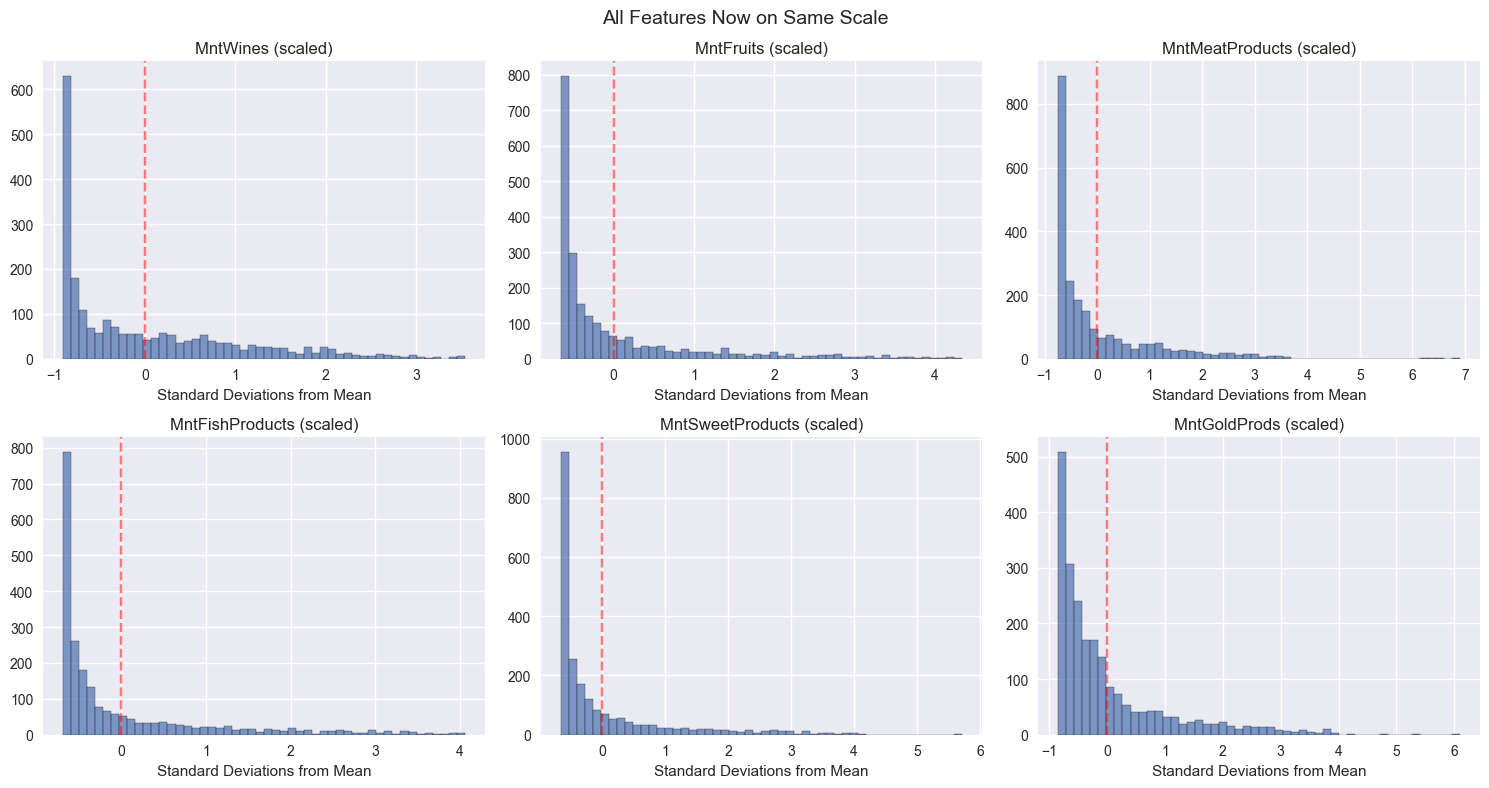

In [ ]:
# STEP 6: SCALE THE DATA (CRITICAL FOR GMM)

from sklearn.preprocessing import StandardScaler

# 1. Initialize Scaler
scaler = StandardScaler()

# 2. Fit & Transform the spending data
X_scaled = scaler.fit_transform(X_spending)

# 3. Convert back to dataframe for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=spending_cols)

print("="*60)
print("AFTER SCALING")
print("="*60)
print("\nScaled data stats (mean ≈ 0, std ≈ 1):")
print(X_scaled_df.describe().round(2))


# Quick visualization of scaled distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(spending_cols):
    axes[idx].hist(X_scaled_df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} (scaled)', fontsize=12)
    axes[idx].axvline(0, color='red', linestyle='--', alpha=0.5)
    axes[idx].set_xlabel('Standard Deviations from Mean')

plt.suptitle('All Features Now on Same Scale', fontsize=14)
plt.tight_layout()
plt.show()



FINDING OPTIMAL K WITH BIC
K= 1: BIC=   33405, AIC=   33250
K= 2: BIC=   15798, AIC=   15483
K= 3: BIC=   11459, AIC=   10985
K= 4: BIC=   10841, AIC=   10207
K= 5: BIC=    9662, AIC=    8868
K= 6: BIC=    8506, AIC=    7552
K= 7: BIC=    8279, AIC=    7164
K= 8: BIC=    7931, AIC=    6657
K= 9: BIC=    7898, AIC=    6464
K=10: BIC=    7926, AIC=    6331

 BIC suggests K = 9
 AIC suggests K = 10


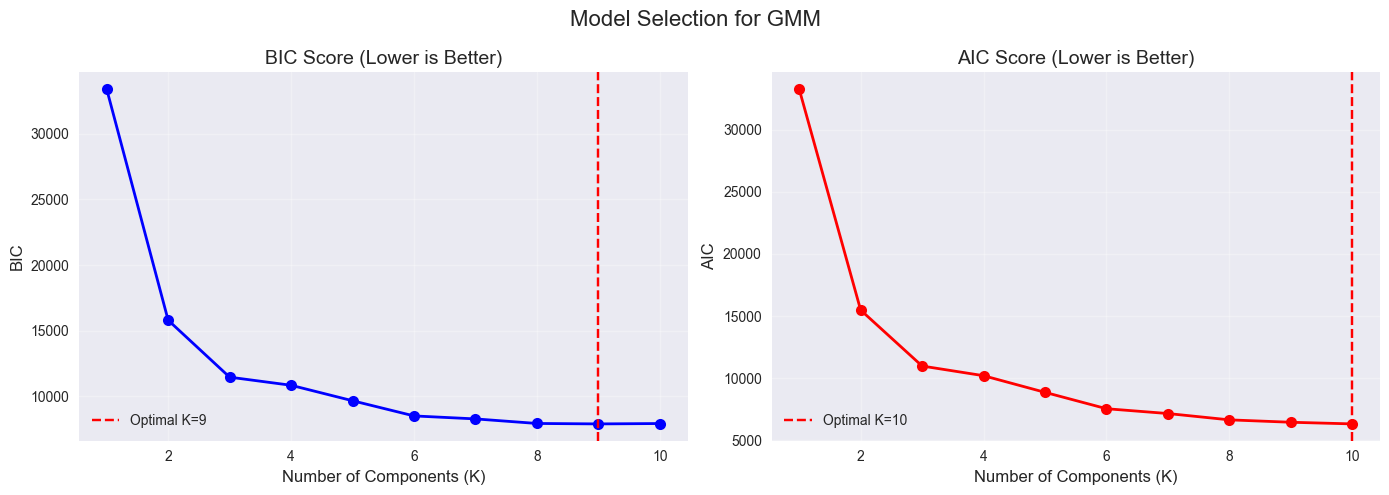


 FINAL DECISION: Using K = 9 (BIC recommendation)


In [ ]:
# STEP 7: FINDING OPTIMAL K USING BIC

from sklearn.mixture import GaussianMixture

# 1. Try different number of clusters
n_components_range = range(1, 11)   # the range of different cluster numbers we'll experiment with
bics = []
aics = []
models = []

print("="*60)
print("FINDING OPTIMAL K WITH BIC")
print("="*60)

for k in n_components_range:
    # 2. Fit GMM
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full', # Start with full (most flexible)
        random_state=42,
        n_init=5 # Runs the algorithm 5 times with different starting points (Multiple Initializations = more reliable results)
    )

    gmm.fit(X_scaled)

    # 3. Store Metrics
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))
    models.append(gmm)

    print(f"K={k:2d}: BIC={bics[-1]:8.0f}, AIC={aics[-1]:8.0f}")  # Print the results for this K value


# 4. Find Optimal K
optimal_k_bic = n_components_range[np.argmin(bics)]
optimal_k_aic = n_components_range[np.argmin(aics)]


print(f"\n BIC suggests K = {optimal_k_bic}")
print(f" AIC suggests K = {optimal_k_aic}")

# 5. Plot BIC and AIC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# BIC plot
ax1.plot(n_components_range, bics, 'bo-', linewidth=2, markersize=8)
ax1.axvline(x=optimal_k_bic, color='red', linestyle='--', 
            label=f'Optimal K={optimal_k_bic}')
ax1.set_xlabel('Number of Components (K)', fontsize=12)
ax1.set_ylabel('BIC', fontsize=12)
ax1.set_title('BIC Score (Lower is Better)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# AIC plot
ax2.plot(n_components_range, aics, 'ro-', linewidth=2, markersize=8)
ax2.axvline(x=optimal_k_aic, color='red', linestyle='--',
            label=f'Optimal K={optimal_k_aic}')
ax2.set_xlabel('Number of Components (K)', fontsize=12)
ax2.set_ylabel('AIC', fontsize=12)
ax2.set_title('AIC Score (Lower is Better)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Model Selection for GMM', fontsize=16)
plt.tight_layout()
plt.show()

# FINAL DECISION: Use the K from BIC (more conservative)
final_k = optimal_k_bic
print(f"\n FINAL DECISION: Using K = {final_k} (BIC recommendation)")

In [ ]:
# STEP 8: FIT FINAL GMM WITH OPTIMAL K

# 1. Fit Final Model
gmm_final = GaussianMixture(
    n_components=9,
    covariance_type='full',   # Most flexible option - lets the data decide cluster shapes
    random_state=42,
    n_init= 10,  # runs the algorithm 10 times from different starting points  (Multiple starts avoid getting stuck in poor solutions)
    verbose=1  # See EM progress
)

gmm_final.fit(X_scaled)

# Get results
labels = gmm_final.predict(X_scaled)    # Hard Assignments
probabilities = gmm_final.predict_proba(X_scaled)      # Soft Assignments (probabilities)


print("="*60)
print("FINAL GMM RESULTS")
print("="*60)
print(f"\nConverged: {gmm_final.converged_}")
print(f"Iterations: {gmm_final.n_iter_}")
print(f"Log-likelihood: {gmm_final.score(X_scaled):.2f}")

# Cluster sizes
unique, counts = np.unique(labels, return_counts=True)
print("\nCluster sizes:")
for cluster, count in zip(unique, counts):
    pct = (count / len(X_scaled)) * 100
    print(f"  Cluster {cluster}: {count} customers ({pct:.1f}%)")

# Confidence scores (max probability per customer)
confidence = probabilities.max(axis=1)
print(f"\nAssignment confidence:")
print(f"  Mean: {confidence.mean():.3f}")
print(f"  Median: {np.median(confidence):.3f}")
print(f"  Min: {confidence.min():.3f}")
print(f"  % with confidence > 0.8: {(confidence > 0.8).mean()*100:.1f}%")

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
Initialization converged.
Initialization 1
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged.
Initialization 2
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged.
Initialization 3
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged.
Initialization 4
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged.
Initialization 5
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged.
Initialization 6
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
Initi

PCA FOR VISUALIZATION
Explained variance ratio: [0.56134956 0.12289132]
Total variance explained: 68.42%


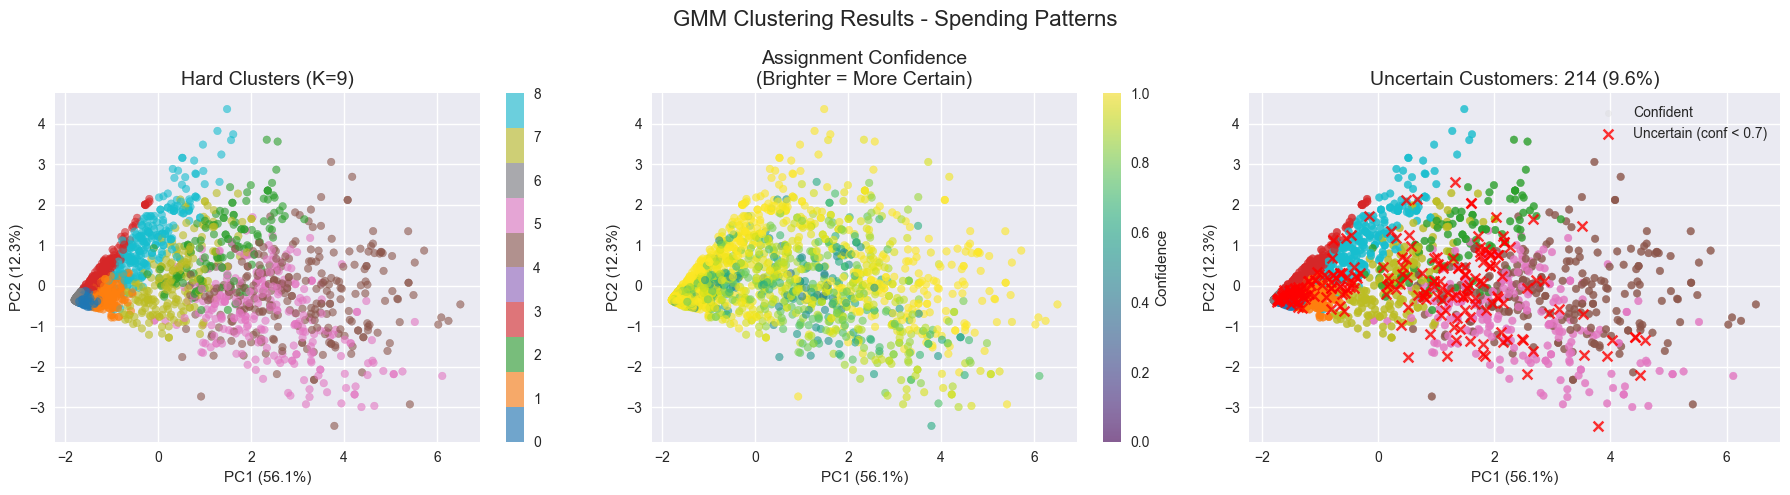

In [ ]:
# STEP 9: VISUALIZING CLUSTERS:

# 1. We will use PCA for 2D visualization since we have 6 dimensions
from sklearn.decomposition import PCA
# Imports PCA (Principal Component Analysis) from sklearn
# PCA is a dimensionality reduction technique
# It takes our 6-dimensional data and finds the 2 most important dimensions
# that capture the most variation in the data

# 2. Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42) 
# Creates a PCA object that will reduce data to 2 components
# n_components=2 means we want 2 dimensions output
# random_state=42 ensures reproducibility
# PCA will find the two directions (principal components) that capture the most variance

# 3. Fit and Transform:
X_pca = pca.fit_transform(X_scaled)
# 1. 'fit': PCA learns the patterns in our scaled data
#    It figures out which combinations of spending categories are most important
# 2. 'transform': It converts each customer from 6D to 2D coordinates
# X_pca now has shape (n_customers, 2) - each customer has an x,y coordinate for plotting

print("="*60)
print("PCA FOR VISUALIZATION")
print("="*60)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# 4. Create Visualization:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Hard clusters
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', 
                           alpha=0.6, s=30)
axes[0].set_title(f'Hard Clusters (K={final_k})', fontsize=14)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.colorbar(scatter1, ax=axes[0], ticks=range(final_k))

# Plot 2: Confidence (uncertainty visualization)
confidence = probabilities.max(axis=1)
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=confidence, 
                           cmap='viridis', alpha=0.6, s=30, vmin=0, vmax=1)
axes[1].set_title('Assignment Confidence\n(Brighter = More Certain)', fontsize=14)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.colorbar(scatter2, ax=axes[1], label='Confidence')

# Plot 3: Low confidence points highlighted
low_confidence = confidence < 0.7
scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c='lightgray', alpha=0.3, s=20, label='Confident')
scatter_high = axes[2].scatter(X_pca[~low_confidence, 0], X_pca[~low_confidence, 1], 
                              c=labels[~low_confidence], cmap='tab10', alpha=0.8, s=30)
scatter_low = axes[2].scatter(X_pca[low_confidence, 0], X_pca[low_confidence, 1], 
                             c='red', alpha=0.8, s=50, marker='x', label='Uncertain (conf < 0.7)')
axes[2].set_title(f'Uncertain Customers: {low_confidence.sum()} ({low_confidence.mean()*100:.1f}%)', fontsize=14)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[2].legend()

plt.suptitle('GMM Clustering Results - Spending Patterns', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#  STEP 10: UNDERSTANDING WHAT EACH CLUSTER REPRESENTS

# Add cluster labels and confidence to original data
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels
df_with_clusters['Confidence'] = confidence

# Calculate average spending per cluster (in original scale, not scaled)
cluster_profiles = df_with_clusters.groupby('Cluster')[spending_cols].mean().round(0)
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()

print("="*60)
print("CLUSTER PROFILES (Average Spending)")
print("="*60)
print("\nCluster sizes:")
for cluster in cluster_sizes.index:
    print(f"  Cluster {cluster}: {cluster_sizes[cluster]} customers ({cluster_sizes[cluster]/len(df)*100:.1f}%)")

print("\nAverage spending per cluster (in original currency):")
print(cluster_profiles)

# Calculate percentage of total spending per category
total_spending = df_with_clusters[spending_cols].sum()
cluster_pct = df_with_clusters.groupby('Cluster')[spending_cols].sum().div(total_spending) * 100

print("\nPercentage of total spending by category:")
print(cluster_pct.round(1))

# Find distinctive features for each cluster
print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS")
print("="*60)

for cluster in range(final_k):
    print(f"\n🔵 CLUSTER {cluster}:")
    
    # Get cluster data
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct_total = (cluster_size / len(df)) * 100
    
    print(f"  Size: {cluster_size} customers ({cluster_pct_total:.1f}% of total)")
    print(f"  Avg confidence: {cluster_data['Confidence'].mean():.3f}")
    
    # Compare to overall averages
    for col in spending_cols:
        cluster_avg = cluster_data[col].mean()
        overall_avg = df[col].mean()
        
        if cluster_avg > overall_avg * 1.5:  # 50% above average
            print(f"     HIGH {col}: {cluster_avg:.0f} vs avg {overall_avg:.0f} (+{(cluster_avg/overall_avg-1)*100:.0f}%)")
        elif cluster_avg < overall_avg * 0.5:  # 50% below average
            print(f"     LOW {col}: {cluster_avg:.0f} vs avg {overall_avg:.0f} ({(1-cluster_avg/overall_avg)*100:.0f}% below)")

CLUSTER PROFILES (Average Spending)

Cluster sizes:
  Cluster 0: 392 customers (17.5%)
  Cluster 1: 248 customers (11.1%)
  Cluster 2: 141 customers (6.3%)
  Cluster 3: 227 customers (10.1%)
  Cluster 4: 262 customers (11.7%)
  Cluster 5: 261 customers (11.7%)
  Cluster 6: 269 customers (12.0%)
  Cluster 7: 195 customers (8.7%)
  Cluster 8: 245 customers (10.9%)

Average spending per cluster (in original currency):
         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0            12.0        4.0             13.0              6.0   
1            86.0       11.0             52.0             14.0   
2           520.0       36.0            439.0             47.0   
3           254.0        2.0             37.0              3.0   
4           509.0       77.0            405.0            115.0   
5           605.0       78.0            431.0            110.0   
6            25.0        0.0              8.0        